
Analyzing the Top 10 Songs 2010 to 2019 from Spotify

The basic premise behind the project is to answer several research based questions.

How can I represent the different variables in a way that makes sense.

Which genre has the most songs in the billboard





In [3]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
music = "top10s.csv"
song = pd.read_csv(music,encoding = "cp1252")
import seaborn as sns

song.head()

Unnamed: 0                 title      artist        top genre  year  bpm  \
0           1      Hey, Soul Sister       Train       neo mellow  2010   97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2           3               TiK ToK       Kesha        dance pop  2010  120   
3           4           Bad Romance   Lady Gaga        dance pop  2010  119   
4           5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78

Now, I want to use the pandas dataframe to see the number of songs an artist has in the top top 10 streamed and to create a quick graph of the top 10.

In [4]:
#replace genre title
song["Genre"]= song["top genre"].replace(to_replace=['dance pop', 'pop'], value="Pop", regex=True)
song["Genre"]= song["Genre"].replace(to_replace=['canadian Pop','barbadian Pop', 'electroPop', 'art Pop', 'australian Pop',
                                      'colombian Pop','colombian Pop', 'acoustic Pop','folk-Pop', 'candy Pop','indie Pop','baroque Pop','moroccan Pop','french Pop','danish Pop','boy band'], value="Pop", regex=True)
song["Genre"]= song["Genre"].replace(to_replace=['detroit hip hop','atl hip hop','hip Pop', 'hip hop', 'canadian hip hop','canadian Hip Pop','electronic trap','australian Hip Pop','chicago rap','alternative r&b']
                                     , value="Hip Pop", regex=True)
song["Genre"]= song["Genre"].replace(to_replace=['neo mellow','complextro','edm', 'permanent wave', 'tropical house','belgian edm','electro','electro house','house','big room','belgian Electro','Electro Electro','brostep','belgian Electro']
                                     , value="Electro", regex=True)
song["Genre"]= song["Genre"].replace(to_replace=['latin','canadian latin']
                                     , value="Latino", regex=True)
song["Genre"]= song["Genre"].replace(to_replace=['canadian contemporary r&b','downtempo', "british soul"]
                                     , value="R&B", regex=True)

#Create clead data

song= song.loc[(song["Genre"]== "Pop") |(song["Genre"]== "Electro") | (song["Genre"]== "Hip Pop") | (song["Genre"]== "R&B") | (song["Genre"]== "Latino "), :]
clean_data_df=song["Genre"].value_counts()
print(clean_data_df.head)

<bound method NDFrame.head of Pop        493
Electro     45
Hip Pop     24
R&B         22
Name: Genre, dtype: int64>


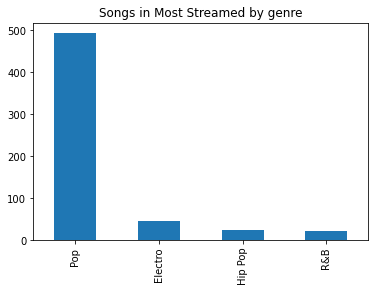

In [5]:

# plotting the top ten song and how many of their songs were in the most dancerble
graph= plt.show(clean_data_df.plot(kind='bar', title='Songs in Most Streamed by genre'))


Now onto a bit more data analysis. Next I'm going to define what a 'good' danceability is:

(0.0, 100.0)

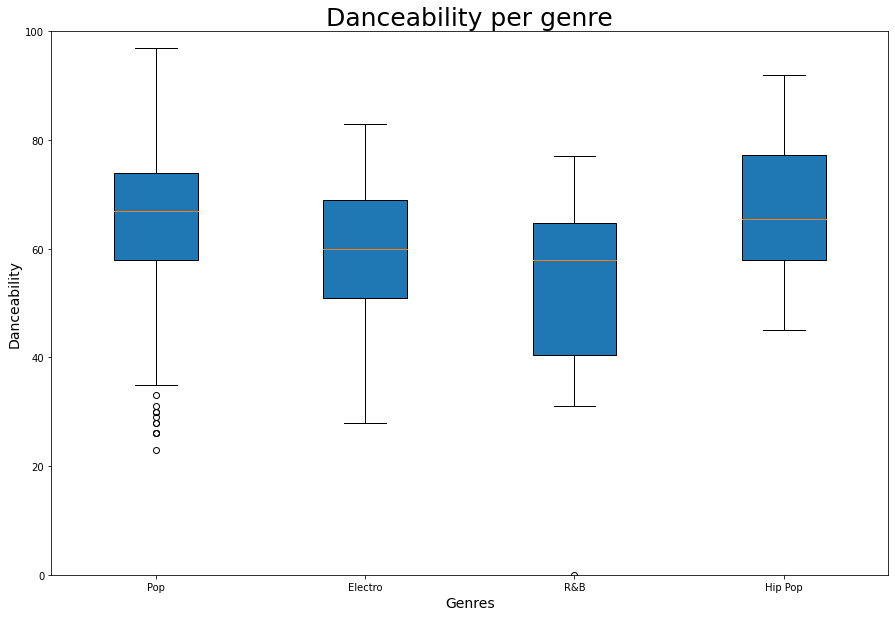

In [6]:
#Boxplot
Pop= song.loc[song["Genre"]== "Pop", "dnce"]
Electro= song.loc[song["Genre"]== "Electro", "dnce"]
RnB= song.loc[song["Genre"]== "R&B", "dnce"]
hp= song.loc[song["Genre"]== "Hip Pop", "dnce"]
data_to_plot=[Pop, Electro, RnB, hp]
names=["Pop", "Electro", "R&B", "Hip Pop"]
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Danceability per genre',fontsize =25)
ax1.set_ylabel('Danceability',fontsize = 14)
ax1.set_xlabel('Genres',fontsize = 14)
ax1.boxplot(data_to_plot, labels=names, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(0, 100)



# the danceability facotr of a song is a factor of both tempo and time signature-->Spotify calculated it as a decimal value

Determining the percentages of songs that make up the categories defined

(0.0, 100.0)

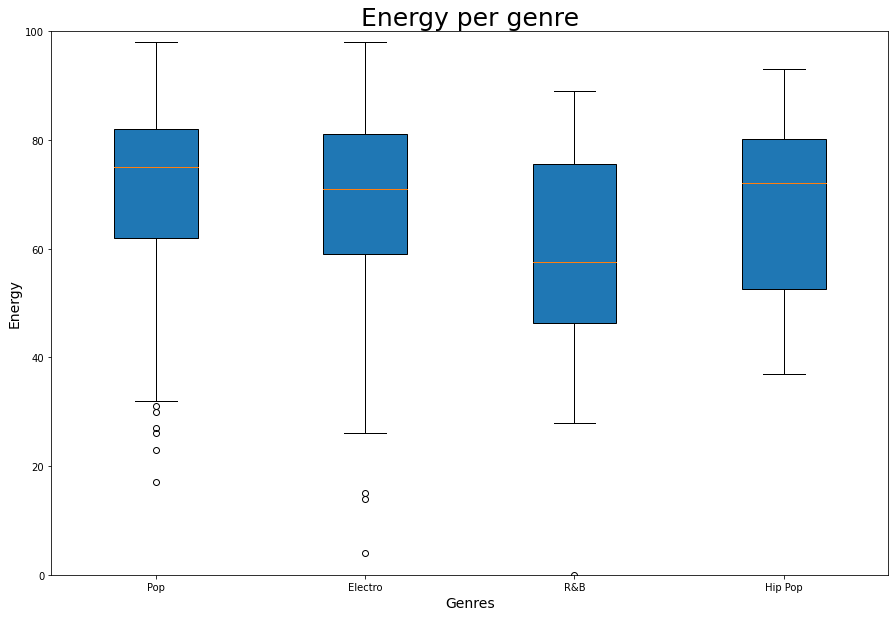

In [7]:
Pop= song.loc[song["Genre"]== "Pop", "nrgy"]
Electro= song.loc[song["Genre"]== "Electro", "nrgy"]
RnB= song.loc[song["Genre"]== "R&B", "nrgy"]
hp= song.loc[song["Genre"]== "Hip Pop", "nrgy"]
data_to_plot=[Pop, Electro, RnB, hp]
names=["Pop", "Electro", "R&B", "Hip Pop"]
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Energy per genre',fontsize =25)
ax1.set_ylabel('Energy',fontsize = 14)
ax1.set_xlabel('Genres',fontsize = 14)
ax1.boxplot(data_to_plot, labels=names, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(0, 100)

Now I'm going to go more into depth about the correlation of all the different values in the dataset

In pandas, there's also a function called .corr()—it basically finds the correlation of the different variables in the dataset (closer to +/- 1 means a stronger positive/negative correlation).

In [8]:
print(song.corr())

            Unnamed: 0      year       bpm      nrgy      dnce        dB  \
Unnamed: 0    1.000000  0.989158 -0.123086 -0.222094  0.073594 -0.146068   
year          0.989158  1.000000 -0.112089 -0.234929  0.079119 -0.139225   
bpm          -0.123086 -0.112089  1.000000  0.129107 -0.143582  0.187788   
nrgy         -0.222094 -0.234929  0.129107  1.000000  0.169966  0.533130   
dnce          0.073594  0.079119 -0.143582  0.169966  1.000000  0.249791   
dB           -0.146068 -0.139225  0.187788  0.533130  0.249791  1.000000   
live         -0.140597 -0.147316  0.091283  0.183218 -0.040327  0.077678   
val          -0.135260 -0.128024  0.005599  0.404154  0.509593  0.282511   
dur          -0.204909 -0.208119 -0.029582 -0.135793 -0.169222 -0.099673   
acous         0.093516  0.099362 -0.109514 -0.567371 -0.237603 -0.196926   
spch          0.009924  0.001043  0.042617  0.103056 -0.037801 -0.002853   
pop           0.154013  0.243577  0.020061 -0.079342  0.116699  0.150479   

           

Text(0.5, 1.0, 'The Correlation Between the Variables')

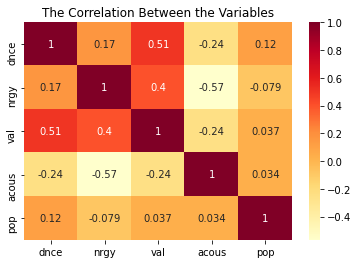

In [9]:
Correlation=song[['dnce','nrgy','val','acous','pop']]
sns.heatmap(Correlation.corr(), annot=True, cmap="YlOrRd")
plt.title("The Correlation Between the Variables")
# Here I'm using a heatmap to see the different values that correlate